In [4]:
import pandas as pd
import numpy as np 
import os

def read_data():
    # set the path of the raw data
    raw_data_path = os.path.join(os.path.pardir,'data','raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read the data with all default parameters
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -888
    df = pd.concat((train_df, test_df), axis=0)
    return df

def process_data(df):
    # using the method chaining concept
    return (df
         # create title attribute - then add this 
         .assign(Title = lambda x: x.Name.map(get_title))
         # working missing values - start with this
         .pipe(fill_missing_values)
         # create fare bin feature
         .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low','low','high','very_high']))
         # create age state
         .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult','Child'))
         .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
         .assign(IsMother = lambda x : np.where(((x.Sex == 'female') & (x.Parch > 0) & (x.Age > 18) & (x.Title != 'Miss')), 1, 0))
          # create deck feature
         .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin)) 
         .assign(Deck = lambda x : x.Cabin.map(get_deck))
         # feature encoding 
         .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1,0))
         .pipe(pd.get_dummies, columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])
         # add code to drop unnecessary columns
         .drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1)
         # reorder columns
         .pipe(reorder_columns)
         )

def get_title(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

def get_deck(cabin):
    return np.where(pd.notnull(cabin),str(cabin)[0].upper(),'Z')

def fill_missing_values(df):
    # embarked
    df.Embarked.fillna('C', inplace=True)
    # fare
    median_fare = df[(df.Pclass == 3) & (df.Embarked == 'S')]['Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # age
    title_age_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(title_age_median , inplace=True)
    return df

def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df 

In [5]:
df = read_data()
df = process_data(df)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

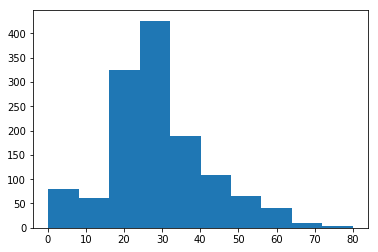

In [7]:
plt.hist(df.Age)

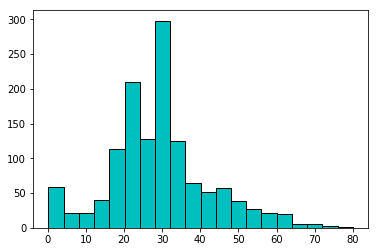

In [9]:
plt.hist(df.Age, bins=20, color='c', edgecolor='black')
plt.show()

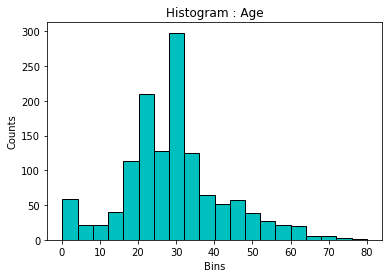

In [10]:
plt.hist(df.Age, bins=20, color='c', edgecolor='black')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

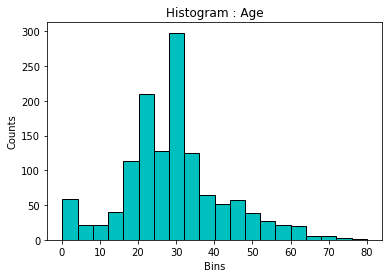

In [11]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c', edgecolor='black')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

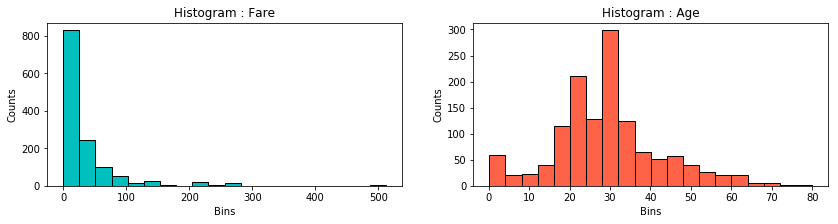

In [15]:
f , (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c', edgecolor='black')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato', edgecolor='black')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

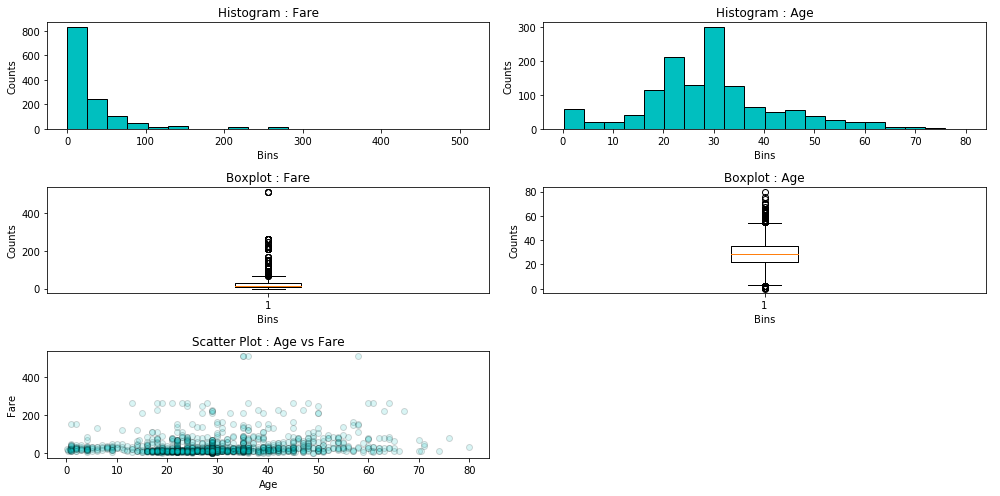

In [18]:
f , ax_arr = plt.subplots(3, 2, figsize=(14,7))

ax_arr[0,0].hist(df.Fare, bins=20, color='c', edgecolor='black')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

ax_arr[0,1].hist(df.Age, bins=20, color='c', edgecolor='black')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Fare')
ax_arr[1,0].set_xlabel('Bins')
ax_arr[1,0].set_ylabel('Counts')

ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Bins')
ax_arr[1,1].set_ylabel('Counts')

ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15, edgecolor='black')
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()

plt.show()